#Random Forest

Algoritmo de la familia de los arboles , similar a Decision Tree ya visto la clase pasada



##Definicion

Random forest es un conjunto de arboles de decision que son combinados por Bagging,
Bagging es combinar varios modelos entrenado en subconjuntos del dataset del train.

![bagging](https://www.iartificial.net/wp-content/uploads/2019/06/Random-Forest-Bagging.webp)

Lo que sucede es hace un cantidad especifica de arbles de decision con muestras de train y luego a la prediccion hace una votacion entre cada arbol

Para clasificacion hace votacion entre arboles y para regresion hace un promedio

## hiper parametros

Los mas usados son:

* **n_estimators**: número de árboles que va a tener el bosque aleatorio. Normalmente cuantos más mejor, pero a partir de cierto punto deja de mejorar y sólo hace que vaya más lento. Un buen valor por defecto puede ser el uso de 100 árboles.
* **n_jobs**: número de cores que se pueden usar para entrenar los árboles. Cada árbol es independiente del resto, así que entrenar un bosque aleatorio es una tarea muy paralelizable. Por defecto sólo utiliza 1 core de la CPU. Para mejorar el rendimiento puedes usar tantos cores como estimes necesario. Si usas n_jobs = -1, estás indicando que quieres usar tantos cores como tenga tu máquina.
* **max_features**: usa forma de garantizar que los árboles son diferentes, es que todos se entrenan con una muestra aleatoria de los datos. Si queremos que todavía sean más diferentes, podemos hacer que distintos árboles usen distintos atributos. Esto puede ser útil especialmente cuando algunos atributos están relacionados entre sí. Hay varias estrategias para elegir el número máximo de atributos que se pueden usar;.

##Ventajas y Desventajas



*   Como ventajas se puede ver que este algorimo es muy usado pra varios problemas y ademas el metodo de bagging ayuda a regularizar el overfitting
*   Desventaja es que como todo modelo no parametrico no son tan bueno extrapolando, quiere decir que es dificl que tengan buenas prediccion cuando los datos son muy diferentes a lo que se tiene normalmente



In [1]:
# importar paquetes importantes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler





In [2]:
#adquisicion de datos
df_bike = pd.read_csv('/content/hour (1).csv')
df_bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
#chequeo de datos
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
#chequeo de nulos
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
#transformaciones

#borrado de la variable object , innecesaria por ser fecha
df_bike.drop(['dteday', 'registered' ,'casual' ], axis = 1, inplace=True)

## Comienzo de entrenamiento

Vamos a trasnfomrar los datos a que sean numericos pero como ejemplo les voy a dejar que tambien hagamos una transformacion de los numeros

In [6]:
#primero spliteamos los datos para entrenar y el target
X = df_bike.drop("cnt", axis=1)
y = df_bike["cnt"]


In [7]:
#spliteo de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
X_train.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [10]:
#transformacion numerica
from sklearn.preprocessing import MinMaxScaler

numeric_encoder = MinMaxScaler()
numeric_encoder.fit(X_train)
x_minmax = numeric_encoder.transform(X_train)
#x_minmax = numeric_encoder.fit_transform(X_train)
pd.DataFrame(x_minmax, columns = X_train.columns)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0.019277,0.000000,0.0,0.000000,0.478261,0.0,1.000000,0.0,0.000000,0.183673,0.1970,0.55,0.263195
1,0.404822,1.000000,0.0,0.818182,0.782609,0.0,0.333333,1.0,0.000000,0.510204,0.5000,0.42,0.122840
2,0.463287,1.000000,0.0,1.000000,0.130435,0.0,0.500000,1.0,0.666667,0.448980,0.4545,1.00,0.263195
3,0.122741,0.333333,0.0,0.272727,0.782609,0.0,0.000000,0.0,0.333333,0.448980,0.4545,0.31,0.000000
4,0.488261,0.000000,0.0,1.000000,0.260870,0.0,0.000000,0.0,0.000000,0.183673,0.2273,0.75,0.122840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13898,0.649327,0.333333,1.0,0.272727,0.391304,0.0,0.833333,1.0,0.000000,0.448980,0.4545,0.88,0.105325
13899,0.688457,0.333333,1.0,0.363636,0.739130,0.0,0.833333,1.0,0.000000,0.653061,0.6212,0.34,0.157870
13900,0.310162,0.666667,0.0,0.636364,0.521739,0.0,0.500000,1.0,0.000000,0.795918,0.7273,0.43,0.333373
13901,0.049488,0.000000,0.0,0.090909,0.304348,0.0,0.333333,1.0,0.000000,0.224490,0.1970,0.65,0.491243


In [11]:
y_train

335       72
7035     518
8051       3
2133     172
8485       1
        ... 
11284    359
11964    812
5390     189
860      100
15795    779
Name: cnt, Length: 13903, dtype: int64

In [12]:
# crear el clasificador
classifier = RandomForestRegressor(n_estimators=100)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(x_minmax, y_train)

RandomForestRegressor()

## Prediccion


In [14]:
#trasnform test dataset con las trasnfomracion del entrenamiento
x_test_encoder = numeric_encoder.transform(X_test)
#fiteo la var x_test ya escalada
y_pred = classifier.predict(x_test_encoder)

In [15]:
y_pred

array([372.72, 103.74,   9.8 , ...,  78.38, 396.08, 239.2 ])

In [16]:
X_test['pred'] = y_pred
X_test['target'] = y_test
X_test.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,pred,target
12830,12831,3,1,6,19,0,6,0,1,0.80,0.6970,0.27,0.1940,372.72,425
8688,8689,1,1,1,20,1,1,0,1,0.24,0.2273,0.41,0.2239,103.74,88
7091,7092,4,0,10,2,0,5,1,1,0.32,0.3030,0.66,0.2836,9.80,4
12230,12231,2,1,5,19,0,2,1,1,0.78,0.7121,0.52,0.3582,564.29,526
431,432,1,0,1,0,0,4,1,1,0.26,0.2273,0.56,0.3881,13.63,13


##Metricas



In [17]:
mean_absolute_error(y_test, y_pred)
mean_absolute_percentage_error(y_test, y_pred)
r2_score(y_test,y_pred)

0.9475930052158031

In [18]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
4,hr,0.581720
0,instant,0.170083
7,workingday,0.085955
9,temp,0.057300
10,atemp,0.037678
11,hum,0.024799
8,weathersit,0.015599
6,weekday,0.010498
12,windspeed,0.008005
3,mnth,0.003843


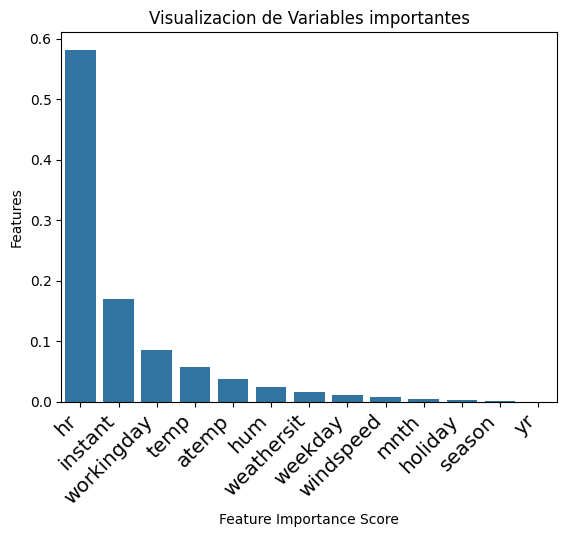

In [19]:
# visualizarcaracterísticas importantes

# Crear un diagrama de barras

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizacion de Variables importantes")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
);

In [20]:
#ejemplo para una uniaca prediccion

example = {'instant': 4000,
           'season':	2,
           "yr"	: 1,
           "mnth"	: 10,
           "hr"	: 10,
           "holiday":0,
           "weekday":	4,
           "workingday"	: 1,
           "weathersit"	: 2,
           "temp"	: 0.50,
           "atemp"	: 0.19,
           "hum"	: 0.33,
           "windspeed": 0.40}

In [21]:
#genera una lista con los valores
data = [*example.values()]
#generar de la lista un arrary con 2D
X_new = np.array(data).reshape(1,-1)


In [22]:
X_new

array([[4.0e+03, 2.0e+00, 1.0e+00, 1.0e+01, 1.0e+01, 0.0e+00, 4.0e+00,
        1.0e+00, 2.0e+00, 5.0e-01, 1.9e-01, 3.3e-01, 4.0e-01]])

In [23]:
#trasnformar nuevo valor
X_new_encoder = numeric_encoder.transform(X_new)
#clasificar
classifier.predict(X_new_encoder)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([124.88])